#### WINE , DETERMINING K CLUSTERS (UNSUPERVISED)

WINE, DETERMINING KMEAN CLUSTERS (UNSUPERVISED)

In [144]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [145]:
wine = pd.read_csv('/Users/gracechongzuting/Downloads/Wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [146]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [147]:
for column in wine.columns:
    check_null = np.mean(wine[column].isnull())
    print(f'{column} has {check_null}% null')

Alcohol has 0.0% null
Malic_Acid has 0.0% null
Ash has 0.0% null
Ash_Alcanity has 0.0% null
Magnesium has 0.0% null
Total_Phenols has 0.0% null
Flavanoids has 0.0% null
Nonflavanoid_Phenols has 0.0% null
Proanthocyanins has 0.0% null
Color_Intensity has 0.0% null
Hue has 0.0% null
OD280 has 0.0% null
Proline has 0.0% null
Customer_Segment has 0.0% null


#### we drop 'Customer Segment' as it is the column that we want to know.

In [148]:
wine = wine.drop(['Customer_Segment'], axis =1)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


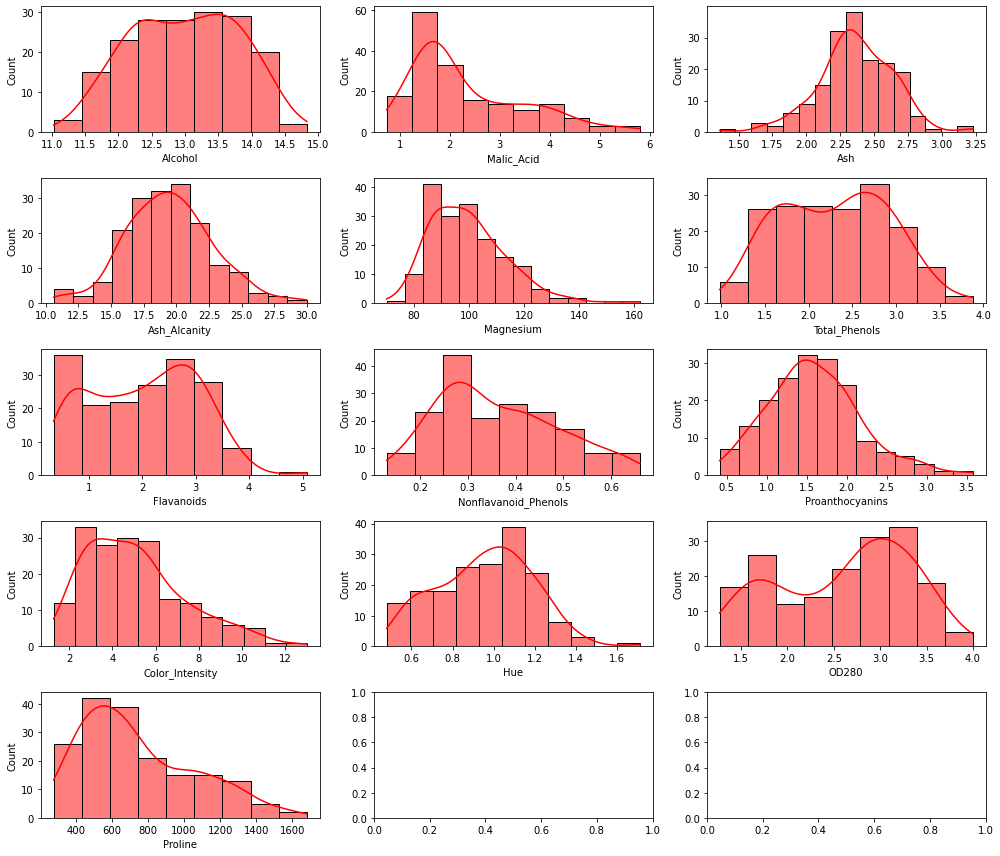

In [149]:
# Density plot for each attribute
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(wine.columns):
    sns.histplot(wine[c], ax = axes_[i], color = 'red', kde =True)
    plt.tight_layout()

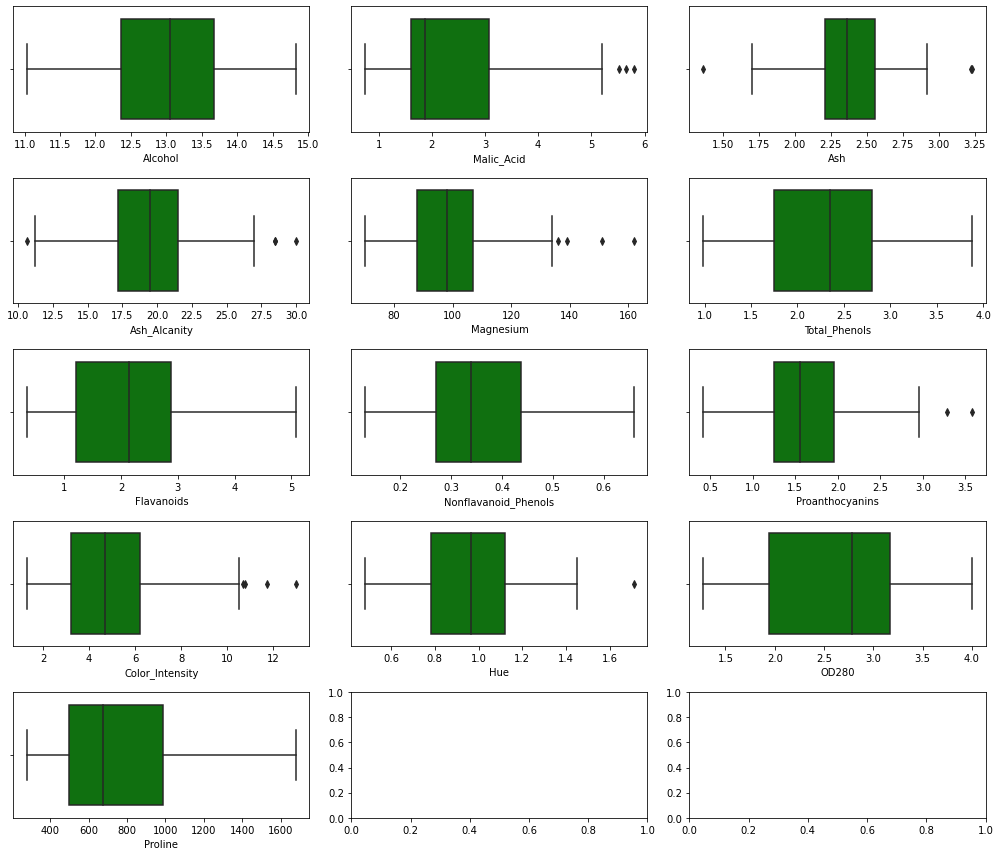

In [150]:
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(wine.columns):
    sns.boxplot(x = wine[c], ax = axes_[i], color = 'green')
    plt.tight_layout()

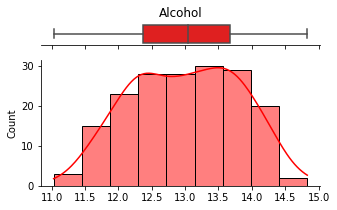

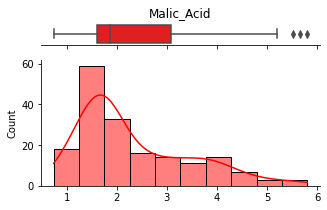

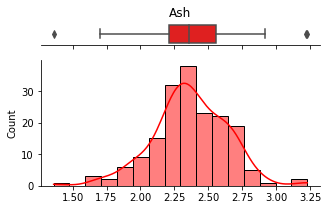

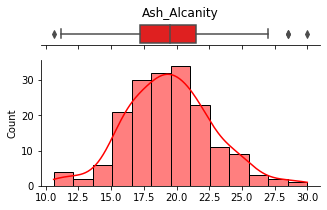

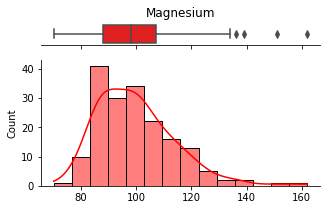

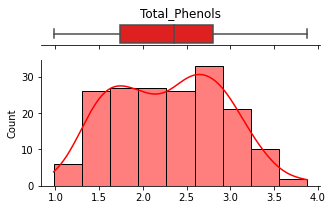

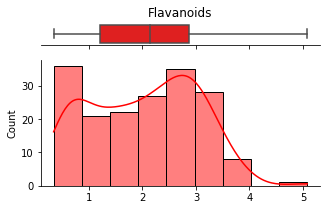

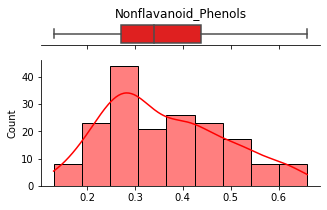

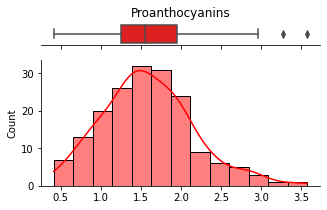

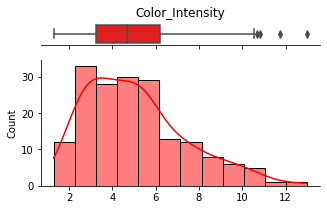

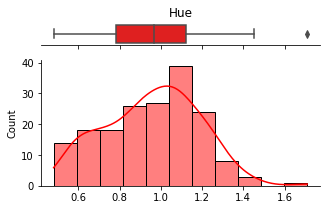

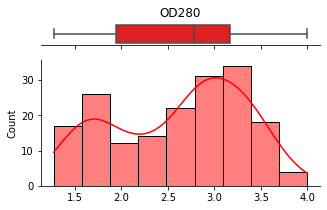

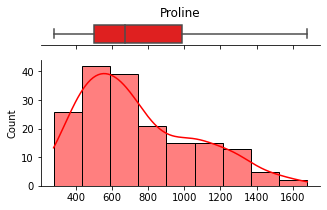

<Figure size 432x288 with 0 Axes>

In [151]:
# Check for Outliers
for c in wine.columns:
    fig, ax = plt.subplots(2,
                           figsize=(5, 3),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(x= wine[c], ax=ax_box, color ='red')
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.histplot(wine[c], ax=ax_hist, kde =True, color ='red')
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()
plt.tight_layout()

<AxesSubplot:>

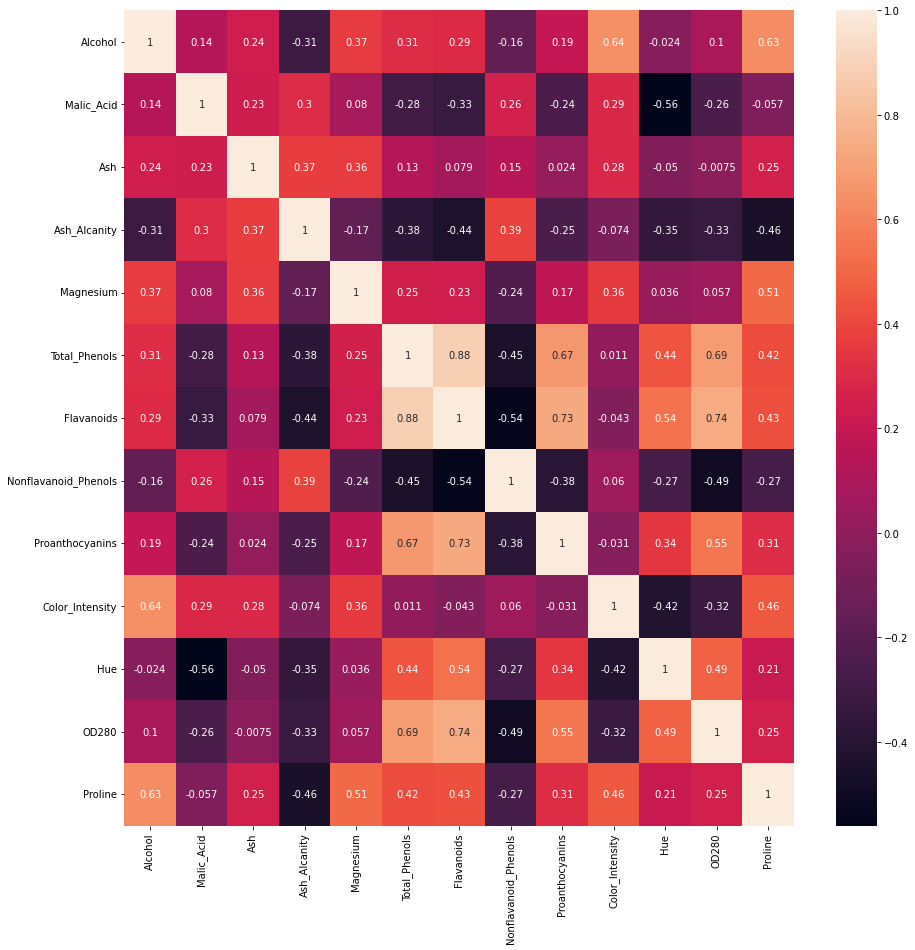

In [152]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(wine.corr(method= 'spearman'),annot=True, ax=ax)

In [153]:
corr = wine.corr(method='spearman')
threshold = 0.6
corr[corr > threshold]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.635425,NaN,NaN,0.63358
Malic_Acid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash_Alcanity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.879404,NaN,0.666689,NaN,NaN,0.687207,NaN
Flavanoids,NaN,NaN,NaN,NaN,NaN,0.879404,1.000000,NaN,0.730322,NaN,NaN,0.741533,NaN
Nonflavanoid_Phenols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.666689,0.730322,NaN,1.000000,NaN,NaN,NaN,NaN
Color_Intensity,0.635425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


#### from above correlation analysis, we see a high correlation on:
- Total_Phenols
- Flavanoids
- Proanthocyanins
- OD280

#### before we work on our kmeans model we need to standardised and rescale, because clustering requires all data in same scale.

In [154]:
wine = wine.drop(['Total_Phenols','Flavanoids','Proanthocyanins','OD280'], axis=1)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Nonflavanoid_Phenols,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,0.28,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,0.26,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,0.30,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,0.24,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,0.39,4.32,1.04,735


In [155]:

new_wine= StandardScaler().fit_transform(wine)


In [156]:
new_wine = pd.DataFrame(new_wine, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Nonflavanoid_Phenols','Color_Intensity','Hue','Proline'])
new_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Nonflavanoid_Phenols,Color_Intensity,Hue,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,-0.659563,0.251717,0.362177,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,-0.820719,-0.293321,0.406051,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,-0.498407,0.269020,0.318304,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,-0.981875,1.186068,-0.427544,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.226796,-0.319276,0.362177,-0.037874


#### Visualise scaled and non-scaled data

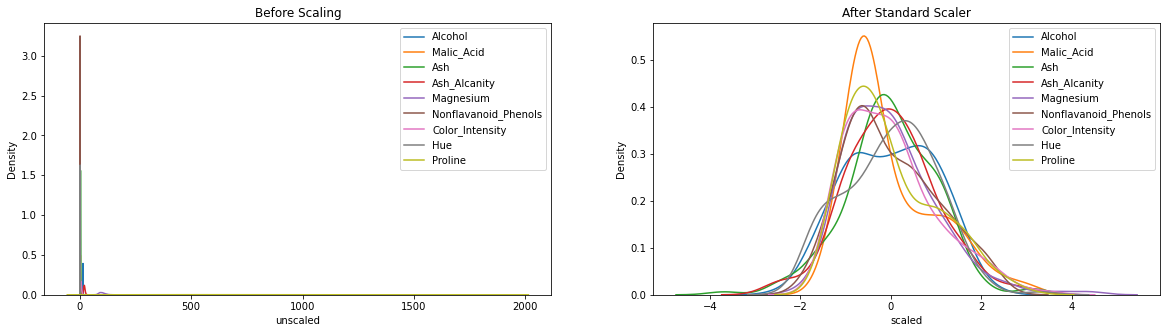

In [170]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(wine['Alcohol'], ax=ax1, label ='Alcohol')
sns.kdeplot(wine['Malic_Acid'], ax=ax1, label = 'Malic_Acid')
sns.kdeplot(wine['Ash'], ax=ax1, label = 'Ash')
sns.kdeplot(wine['Ash_Alcanity'], ax=ax1, label ='Ash_Alcanity')
sns.kdeplot(wine['Magnesium'], ax=ax1, label ='Magnesium')
sns.kdeplot(wine['Nonflavanoid_Phenols'], ax=ax1, label ='Nonflavanoid_Phenols')
sns.kdeplot(wine['Color_Intensity'], ax=ax1, label ='Color_Intensity')
sns.kdeplot(wine['Hue'], ax=ax1, label= 'Hue')
sns.kdeplot(wine['Proline'], ax=ax1, label='Proline')
ax1.set_xlabel('unscaled')
ax1.legend(loc ='upper right', fontsize =10)

ax2.set_title('After Standard Scaler')
sns.kdeplot(new_wine['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(new_wine['Malic_Acid'], ax=ax2, label = 'Malic_Acid')
sns.kdeplot(new_wine['Ash'], ax=ax2, label = 'Ash')
sns.kdeplot(new_wine['Ash_Alcanity'], ax=ax2, label ='Ash_Alcanity')
sns.kdeplot(new_wine['Magnesium'], ax=ax2, label ='Magnesium')
sns.kdeplot(new_wine['Nonflavanoid_Phenols'], ax=ax2, label ='Nonflavanoid_Phenols')
sns.kdeplot(new_wine['Color_Intensity'], ax=ax2, label ='Color_Intensity')
sns.kdeplot(new_wine['Hue'], ax=ax2, label= 'Hue')
sns.kdeplot(new_wine['Proline'], ax=ax2, label='Proline')
ax2.set_xlabel('scaled')
ax2.legend(loc ='upper right', fontsize =10)



#### Now, let's determine our best value of K using elbow method

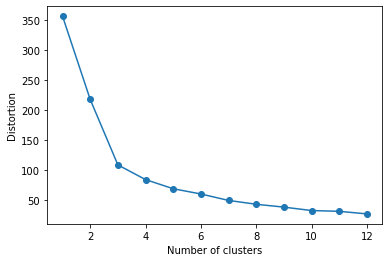

In [206]:
X = new_wine[['Alcohol','Malic_Acid']].values
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 13):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Iteration N Clusters: k: 1
Iteration N Clusters: k: 2
Iteration N Clusters: k: 3
Iteration N Clusters: k: 4
Iteration N Clusters: k: 5
Iteration N Clusters: k: 6
Iteration N Clusters: k: 7
Iteration N Clusters: k: 8
Iteration N Clusters: k: 9
Iteration N Clusters: k: 10
Iteration N Clusters: k: 11


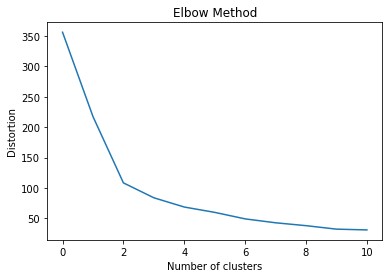

In [207]:
def elbow_method(epsilon, figure=False):
    distortion = [] 
    diff = np.inf
    i = 1
    
    while diff > epsilon:
        print("Iteration N Clusters: k: {k}".format(k=i))
        kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300,n_init = 10, random_state = 0)
        kmeans.fit(X)
        
        if diff == np.inf:
            diff = kmeans.inertia_
        elif kmeans.inertia_ == 0:
            distortion.append(kmeans.inertia_)
            break
        else:
            diff = (distortion[-1] - kmeans.inertia_)/distortion[-1]
        distortion.append(kmeans.inertia_)
        i += 1
        
    if figure:
        plt.plot(range(0,len(distortion)), distortion)
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()
    k = i-1
    return distortion, k

# Results Plot
epsilon = 0.05 
distortion, _ = elbow_method(epsilon, figure=True)

#### let's determine optimal k value

In [208]:

epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteration N Clusters: k: 1
Iteration N Clusters: k: 2
Iteration N Clusters: k: 3
Iteration N Clusters: k: 4


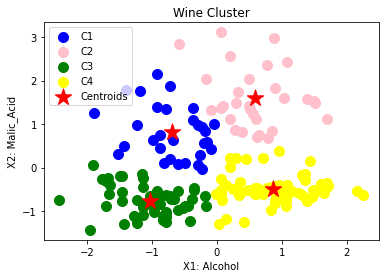

In [209]:

kmeans = KMeans(n_clusters = k, init= 'random', max_iter = 300, n_init =10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue',label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'pink',label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green',label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow',label = 'C4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroids', marker='*')
plt.title('Wine Cluster')
plt.xlabel('X1: Alcohol')
plt.ylabel('X2: Malic_Acid')
plt.legend()
plt.show()